## Скрипт генерации прецедентов для одной задачи

Загрузим трассу вершин из файла `trace.txt` и для каждой вершины сформируем объект `Vertex`, состоящий из координат вершины и координат нормализованного вектора, указывающего на следующую вершину. Если вершина последняя в трассе, вектор ответа устанавливается нулевым.

In [1]:
import Trace as tr
import ProblemsFolder as pf

folder = pf.ProblemsFolder()
trace = tr.Trace(folder.traceFilename(0))

Загрузим сетчатку и задачу.

In [2]:
from Retina import Retina
from Problem import Problem

problem = Problem(folder.problemFilename(0))
retina = Retina('config.ini')
retina.loadFromCommonFile()
#retina.plot()
#problem.plot()

retina.ret


Создадим ряд прецедентов для заданной задачи.

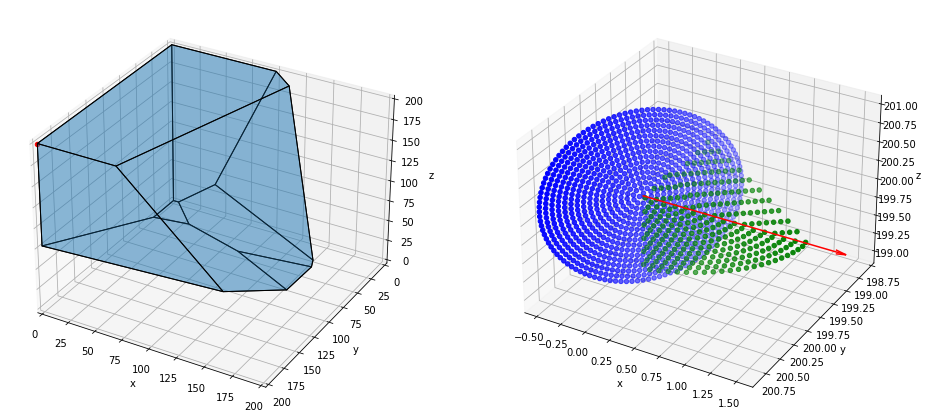

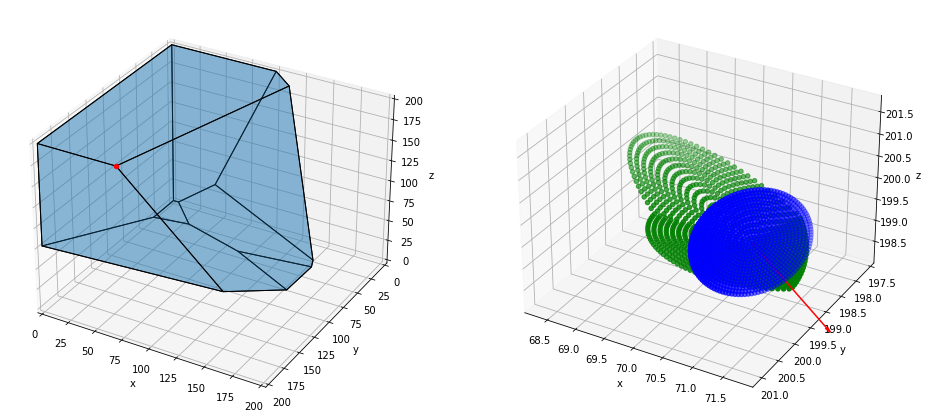

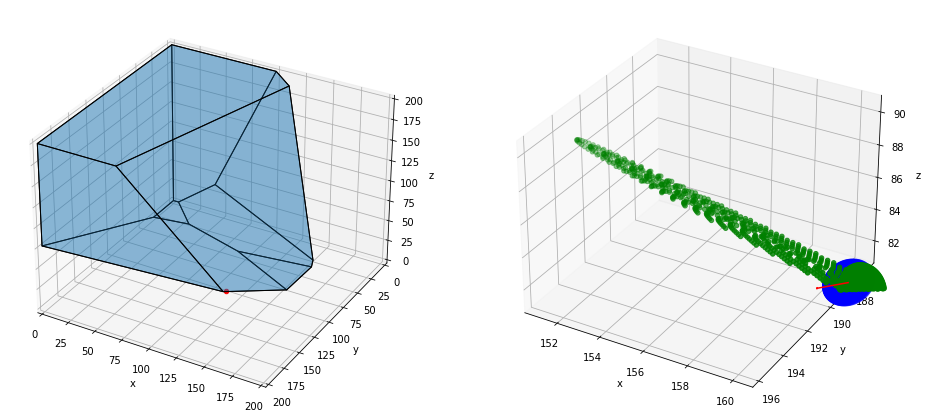

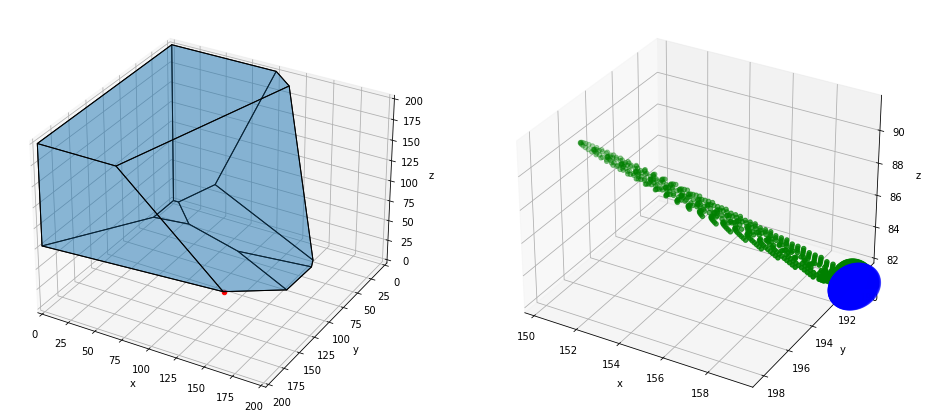

In [3]:
from Precedent import Precedent

for item in trace:
    precedent = Precedent(problem, retina, item)
    precedent.plot()